In [0]:
# import os
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# !pwd
# os.chdir('gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce')
# !pwd
# !ls

## Import necessary libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data exploration

In [0]:
data = pd.read_csv("/content/gdrive/Shared drives//brazilian-ecommerce/olist_order_reviews_dataset.csv")

In [0]:
data.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [0]:
data.shape

(100000, 7)

We are only interested in the review so we can remove other features and drop samples with NaN values in the feature review_comment_message.

In [0]:
data = data[['review_comment_message', 'review_score']].dropna()
data.head()

,review_comment_message,review_score
3,Recebi bem antes do prazo estipulado.,5
4,Parabéns lojas lannister adorei comprar pela I...,5
9,aparelho eficiente. no site a marca do aparelh...,4
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4
15,"Vendedor confiável, produto ok e entrega antes...",5


In [0]:
data.shape

(41753, 2)

In [0]:
data['review_comment_length'] = data['review_comment_message'].apply(len)
data.head()

,review_comment_message,review_score,review_comment_length
3,Recebi bem antes do prazo estipulado.,5,37
4,Parabéns lojas lannister adorei comprar pela I...,5,104
9,aparelho eficiente. no site a marca do aparelh...,4,175
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",4,45
15,"Vendedor confiável, produto ok e entrega antes...",5,57


In [0]:
data.shape

(41753, 3)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41753 entries, 3 to 99999
Data columns (total 3 columns):
review_comment_message    41753 non-null object
review_score              41753 non-null int64
review_comment_length     41753 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [0]:
data.describe()

,review_score,review_comment_length
count,41753.000000,41753.000000
mean,3.640409,71.364525
std,1.626383,55.928700
min,1.000000,1.000000
25%,2.000000,29.000000
50%,4.000000,55.000000
75%,5.000000,99.000000
max,5.000000,269.000000


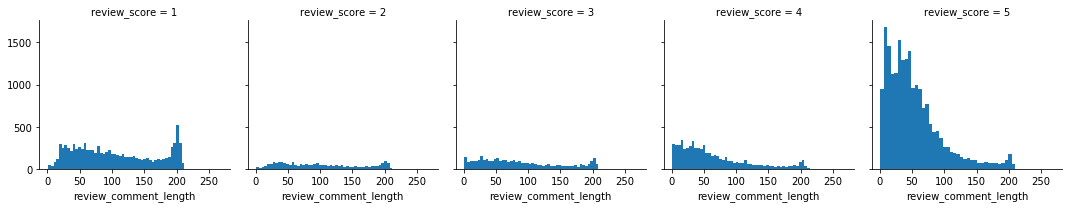

In [0]:
grid = sns.FacetGrid(data=data, col='review_score')
grid.map(plt.hist, 'review_comment_length', bins=50);

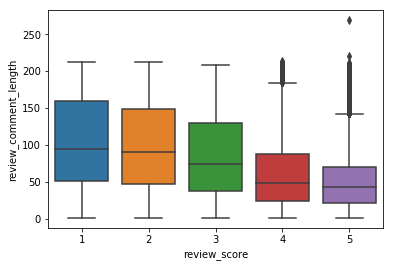

In [0]:
sns.boxplot(x='review_score', y='review_comment_length', data=data);

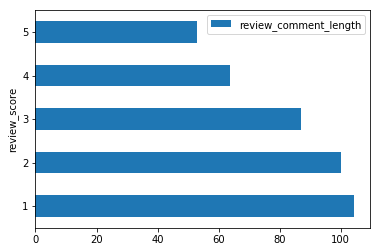

In [0]:
score = data.groupby('review_score').mean()
score.plot.barh();

In [0]:
review = data[['review_comment_message']]
review.head()

,review_comment_message
3,Recebi bem antes do prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...
9,aparelho eficiente. no site a marca do aparelh...
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
15,"Vendedor confiável, produto ok e entrega antes..."


In [0]:
# !pip install googletrans 
# from googletrans import Translator
# import pandas as pd
# translator = Translator()
# df = pd.DataFrame({'Spanish':['piso','cama']})
# df['English'] = df['Spanish'].apply(translator.translate, src='es', dest='en').apply(getattr, args=('text',))
# df

In [0]:
# #!pip install googletrans 
# from googletrans import Translator
# translator = Translator()
# review['English'] = review['review_comment_message'].map(lambda x: translator.translate(x, src="pt", dest="en").text)

In [0]:
text = review.to_string()

In [0]:
# # Imports PIL module  
# from PIL import Image
# # open method used to open different extension image file 
# im = Image.open(r"/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/brazil_map.jpg")  
  
# # This method will show image in any image viewer  
# im.show()  

In [0]:
# mask = np.array(Image.open("/content/gdrive/Shared drives/ISE467 : Project 2&3/brazilian-ecommerce/brazil_map.jpg"))

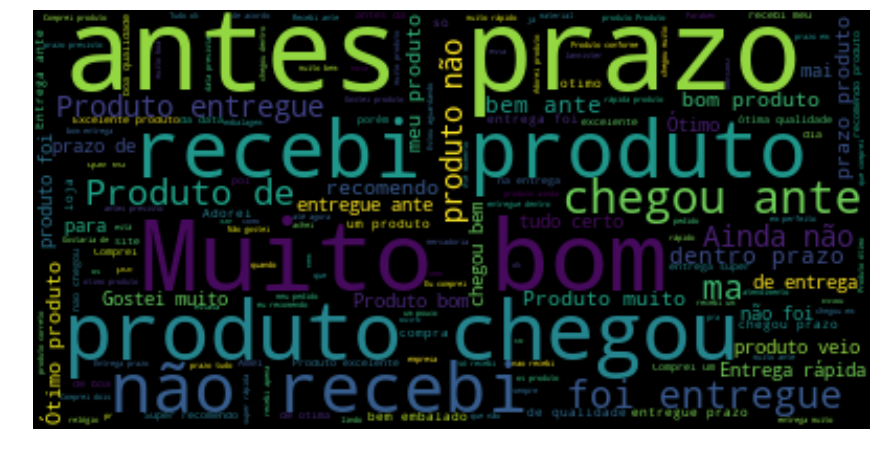

In [0]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

## Vectorization

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

vectorizer = TfidfVectorizer(max_features=100, ngram_range=(2, 4),
                             stop_words=stopwords.words('portuguese'))
vectorizer.fit(review['review_comment_message'])
X = vectorizer.transform(review['review_comment_message'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Dimensionality reduction
We have a lot of features, let's use a PCA(Principal Component Analysis) available in Scikit-Learn to reduce the dimensionality. This will reduce the processing time and help with the visualizations.

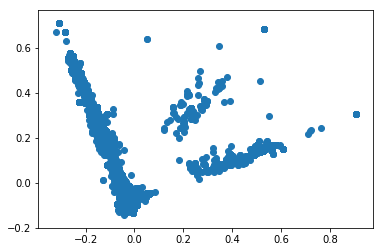

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca.fit(X.toarray())
X_pca = pca.transform(X.toarray())
plt.scatter(X_pca[:, 0], X_pca[:, 1]);

## Clustering
We can see above that our data can be divided in two or more clusters. Due to the shape of our data maybe K-means isn't a good option, let's try to use a AgglomerativeClustering available in Scikit-Learn:
Agglomerative Clustering is one of the most common hierarchical clustering techniques.

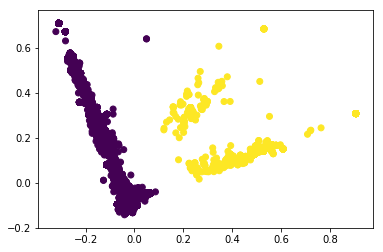

In [0]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
predicted = model.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted);

In [0]:
review['predicted'] = predicted
review.head()

,review_comment_message,predicted
3,Recebi bem antes do prazo estipulado.,0
4,Parabéns lojas lannister adorei comprar pela I...,0
9,aparelho eficiente. no site a marca do aparelh...,0
12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",0
15,"Vendedor confiável, produto ok e entrega antes...",0


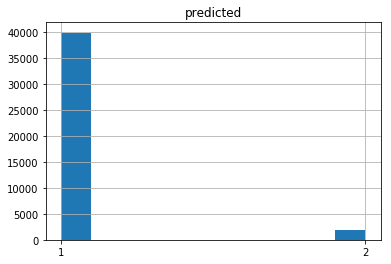

In [0]:
review[['predicted']].hist();
plt.xticks(np.arange(2), np.arange(1, 3));

## Word Clouds of the Clusters

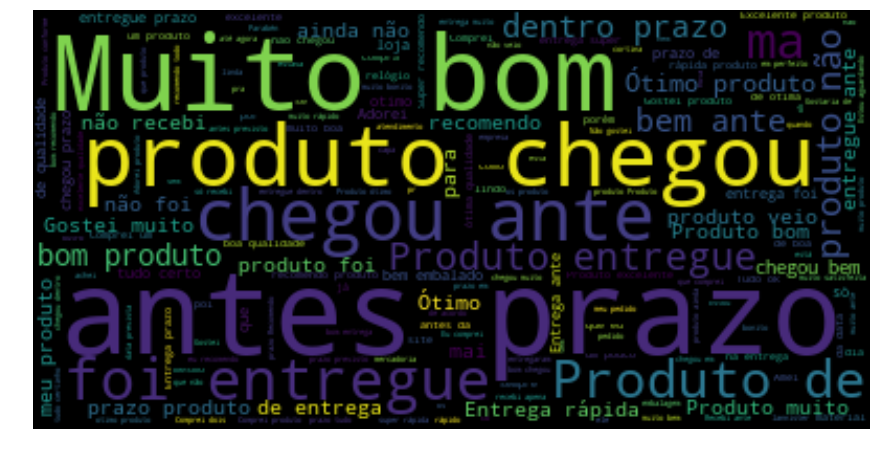

In [0]:
text = review[review['predicted'] == 0]['review_comment_message'].to_string()

wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

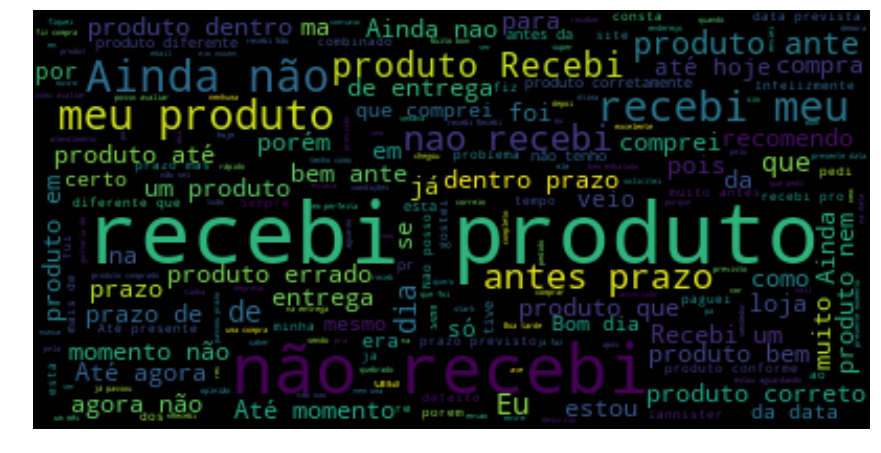

In [0]:
text = review[review['predicted'] == 1]['review_comment_message'].to_string()

wordcloud = WordCloud().generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

## Conclusions
Looking at the word clouds we can see that the delivery time is very important for the customers. The first cluster looks like good reviews that shows compliments and contentment mainly related to the early delivery of the products. On the other hand the second cluster shows discontentment about delays in delivery and in some cases the wrong product beeing delivered but the delays still are majority.
chegou ante -> came before

This shows that the delivery is something that the seller have to pay extra attention, always looking for a transporter that has low rate of delay and in most cases delivery early than the estimated.